In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import networkx as nx
from os import listdir
import tarfile
import  tarfile
import pandas as pd

path = "data\gnnet-ch23-dataset-cbr-mb"
delays = []
for folder in listdir(path):
    if "results" in folder: # and ("5-21" in folder or "0-21" in folder):
        tar = tarfile.open(path + "\\" + folder)
        for member in tar.getmembers():
            if "experimentResults.txt" in member.name:                        
                f=tar.extractfile(member)
                content = f.readlines()
                for line in content:
                    delays.append(float(line.decode('utf-8').split('|')[0].split(",")[-1]))


4228
[0.00078258, 0.02787896, 0.00626035, 0.00370488, 8.42e-05, 0.03748763, 0.03204697, 8.473e-05, 0.01277985, 0.0021452, 0.00951018, 0.00762302, 0.03129561, 0.00051531, 0.02800416, 0.05778775, 0.03153114, 0.00778941, 7.436e-05, 0.00201849, 0.00647741, 0.01315398, 0.01278528, 0.00784838, 0.00743251, 0.04296965, 0.00088919, 0.00244033, 0.05864664, 0.00376613, 0.0070621, 0.0114623, 0.01181553, 8.949e-05, 0.00221132, 9.735e-05, 0.03905719, 0.00401599, 0.01330854, 0.00398022, 0.00596087, 0.00752176, 0.00273848, 0.03190722, 0.00010542, 0.00061087, 8.571e-05, 0.0193035, 0.01442071, 9.813e-05, 0.04172555, 9.043e-05, 0.00331224, 0.00769186, 0.01352399, 0.00010566, 0.00410496, 0.0139091, 0.01401689, 0.03359539, 0.00503181, 0.02596544, 0.0201414, 0.00144842, 8.98e-05, 0.05481861, 9.829e-05, 0.03766567, 0.00520113, 8.576e-05, 0.00772676, 0.03041426, 8.264e-05, 0.05580669, 8.972e-05, 0.00062864, 0.00279161, 0.00060156, 0.00822981, 0.00433778, 0.02405341, 0.01663808, 0.00177484, 0.002805, 0.0072081

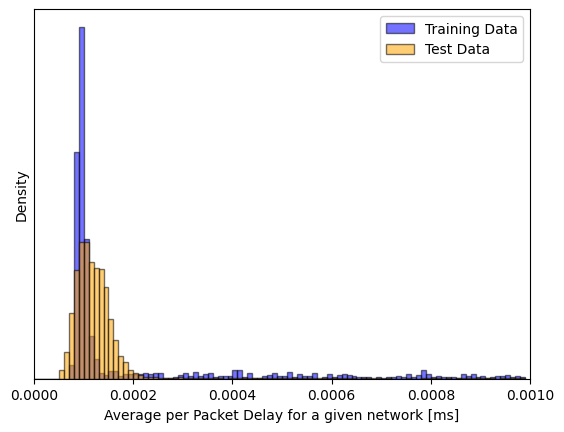

In [18]:
print(len(delays))
print(delays)
df = pd.read_json("results.json", dtype=False)
plt.hist(delays, np.arange(0,0.001,0.00001),edgecolor="black", color = "blue", alpha = 0.55, label = 'Training Data', density = True)
plt.hist(df.predicted_delay, np.arange(0,0.001,0.00001),edgecolor="black", color = "orange", alpha = 0.55, label = 'Test Data', density = True)
plt.xlabel("Average per Packet Delay for a given network [ms]")
plt.ylabel("Density")
plt.xlim([0,0.001])
plt.yticks([])
plt.legend()
# plt.savefig("DelayDist.pdf")
plt.show()

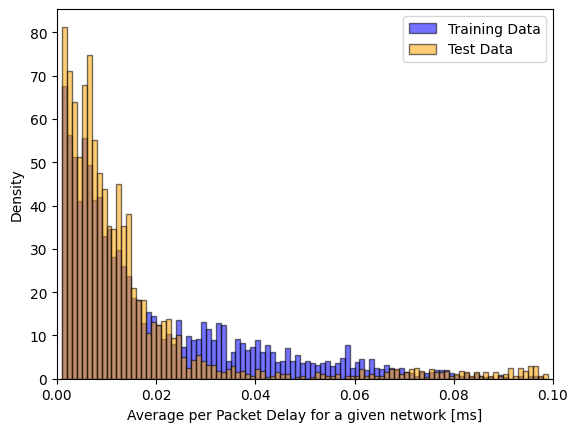

In [19]:
plt.hist(delays, np.arange(0.001,0.1,0.001),edgecolor="black", color = "blue", alpha = 0.55, label = 'Training Data', density=True)
plt.hist(df.predicted_delay, np.arange(0.001,0.1,0.001),edgecolor="black", color = "orange", alpha = 0.55, label = 'Test Data', density = True)
plt.xlabel("Average per Packet Delay for a given network [ms]")
plt.ylabel("Density")
plt.xlim([0,0.1])
plt.legend()
# plt.savefig("DelayDistTail.pdf")
plt.show()